In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [55]:
df = pd.read_csv("C:\\Users\\Sindhu\\Downloads\\Call_Volume_Trend_Analysis_Project_9.xlsx - Call_Data.csv")

In [56]:
df.describe()

,Agent_ID,Queue_Time(Secs),Time,Call_Seconds (s)
count,8.379000e+04,117988.000000,117988.000000,117988.000000
mean,1.000034e+06,52.168051,13.701792,139.532147
std,1.820655e+01,46.154871,3.234274,158.512450
min,1.000001e+06,0.000000,9.000000,0.000000
25%,1.000019e+06,8.000000,11.000000,0.000000
50%,1.000034e+06,40.000000,13.000000,115.000000
75%,1.000050e+06,103.000000,16.000000,202.250000
max,1.000065e+06,122.000000,21.000000,3872.000000


In [57]:
df.describe(include='object')

,Agent_Name,Customer_Phone_No,Date_&_Time,Time_Bucket,Duration(hh:mm:ss),Call_Status,Wrapped _By,Ringing,IVR _Duration
count,83790,117988,117988,117988,117988,117988,70111,117988,117988
unique,65,17107,23,12,1230,3,2,1,174
top,Executives 59,80774XXXXX,1/17/2022,11_12,0:00:00,answered,Agent,YES,0:00:16
freq,2403,77,22347,14626,34512,82452,60396,117988,12419


In [58]:
df.shape

(117988, 13)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117988 entries, 0 to 117987
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Agent_Name          83790 non-null   object 
 1   Agent_ID            83790 non-null   float64
 2   Customer_Phone_No   117988 non-null  object 
 3   Queue_Time(Secs)    117988 non-null  int64  
 4   Date_&_Time         117988 non-null  object 
 5   Time                117988 non-null  float64
 6   Time_Bucket         117988 non-null  object 
 7   Duration(hh:mm:ss)  117988 non-null  object 
 8   Call_Seconds (s)    117988 non-null  float64
 9   Call_Status         117988 non-null  object 
 10  Wrapped _By         70111 non-null   object 
 11  Ringing             117988 non-null  object 
 12  IVR _Duration       117988 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 11.7+ MB


#### Handle the duplicates

In [60]:
#check the duplicates before
df.duplicated().sum()

941

In [61]:
#drop the duplicates in the df
df.drop_duplicates(inplace=True)

In [62]:
#check the duplicates after
df.duplicated().sum()

0

#### Handle the missing values

In [63]:
#function to find the missing values and % of missing values in a df:
"""
Description: Function to return the missing values and % of missing values in a dataframe
param: dataframe
Return type: dataframe
"""
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Missing Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Missing Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [64]:
#call the missing values function and pass the param dataframe
missing_values_table(df)

Your selected dataframe has 13 columns.
There are 3 columns that have missing values.


,Missing Values,% of Missing Values
Wrapped _By,46936,40.1
Agent_Name,33257,28.4
Agent_ID,33257,28.4


<Axes: >

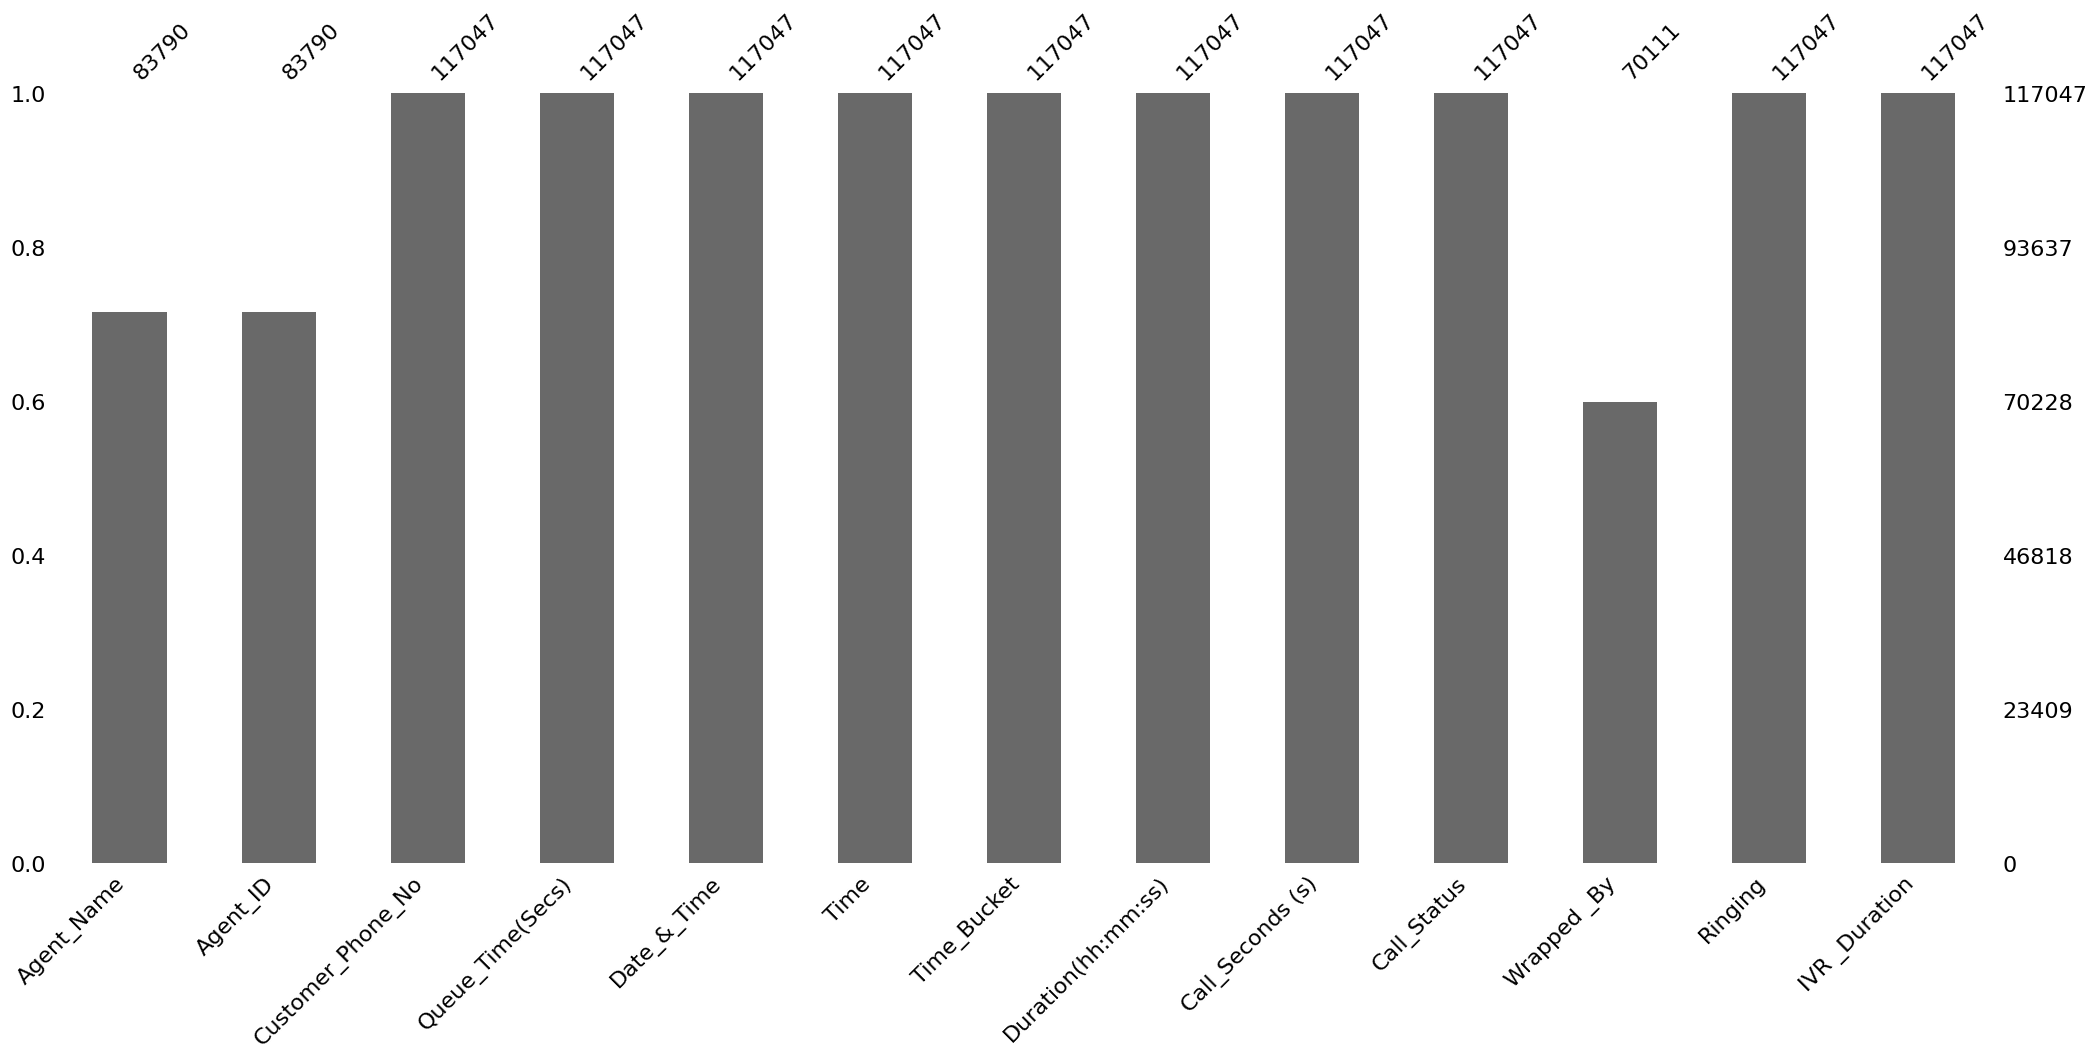

In [65]:
#visualizing the missing values using bar graph:
msno.bar(df)

<Axes: >

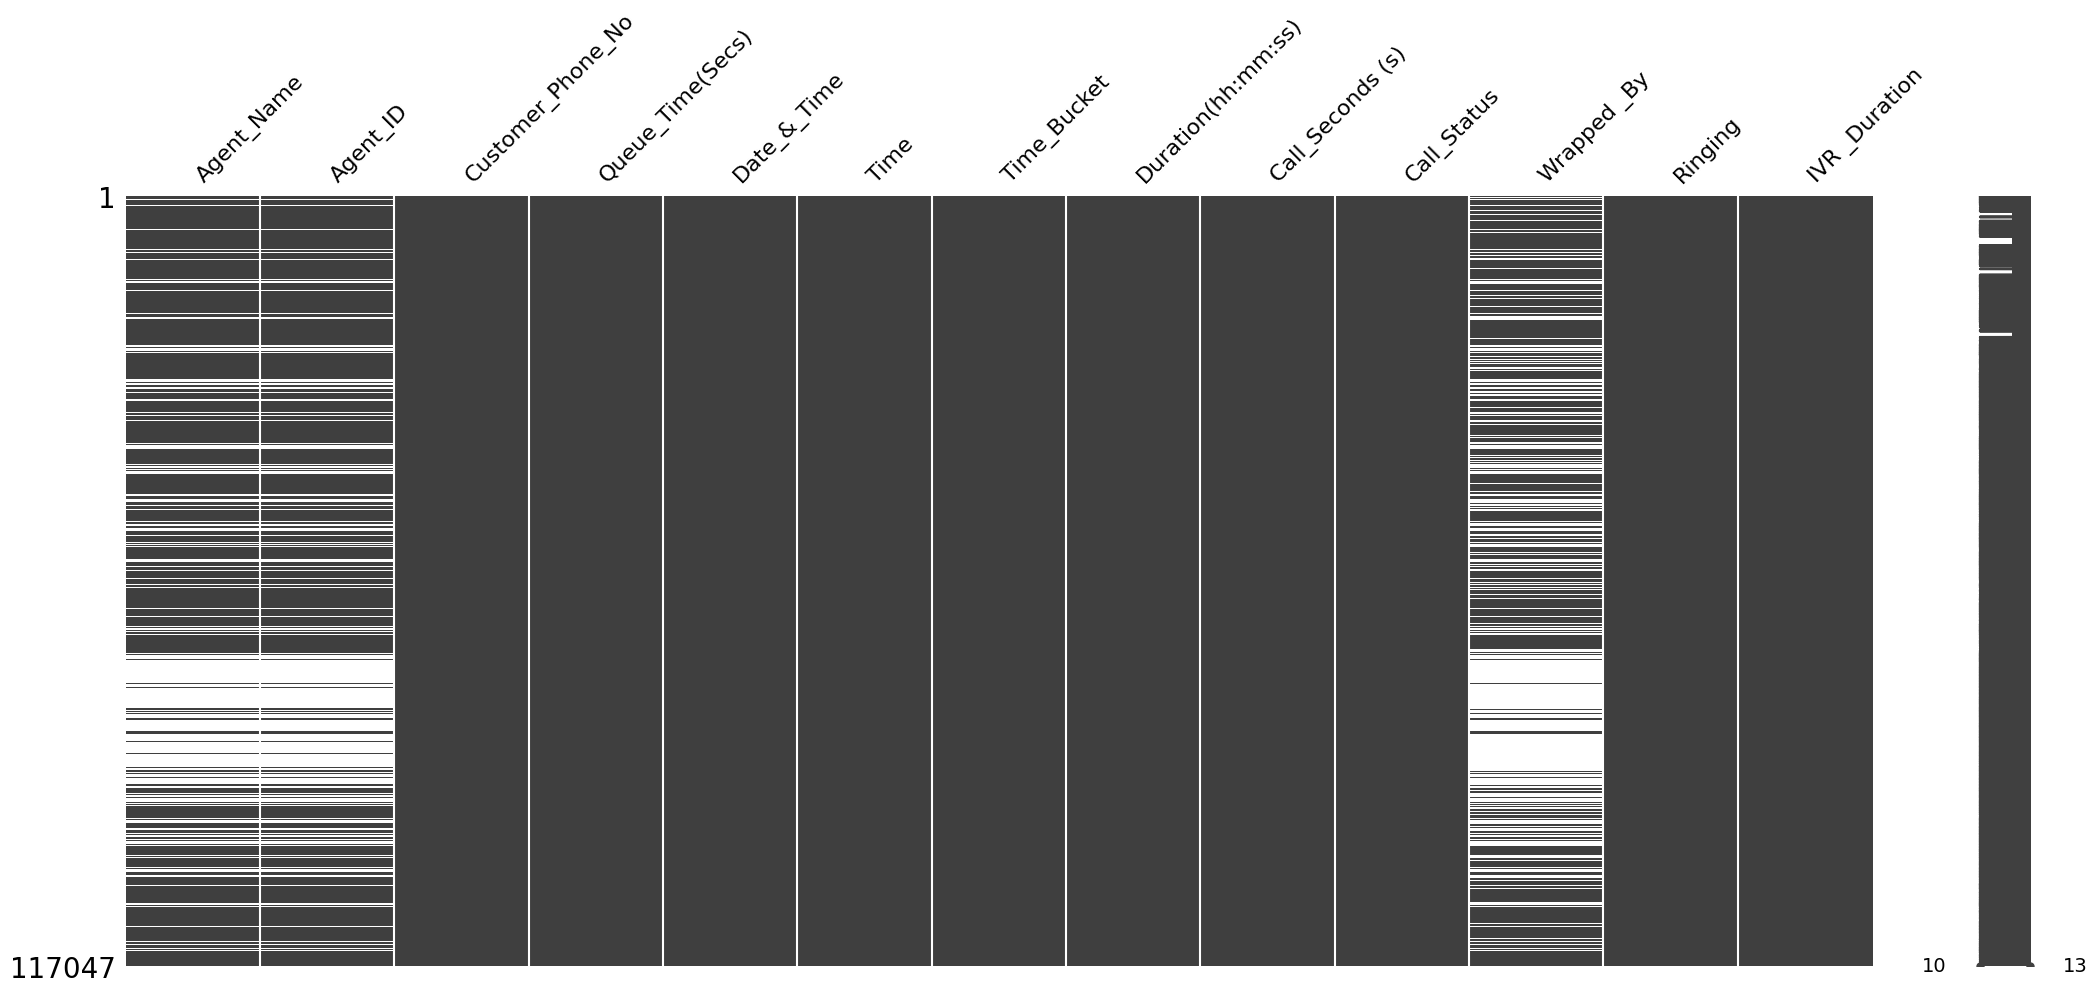

In [66]:
#matrix to determine the pattern of missing values:
msno.matrix(df)

<Axes: >

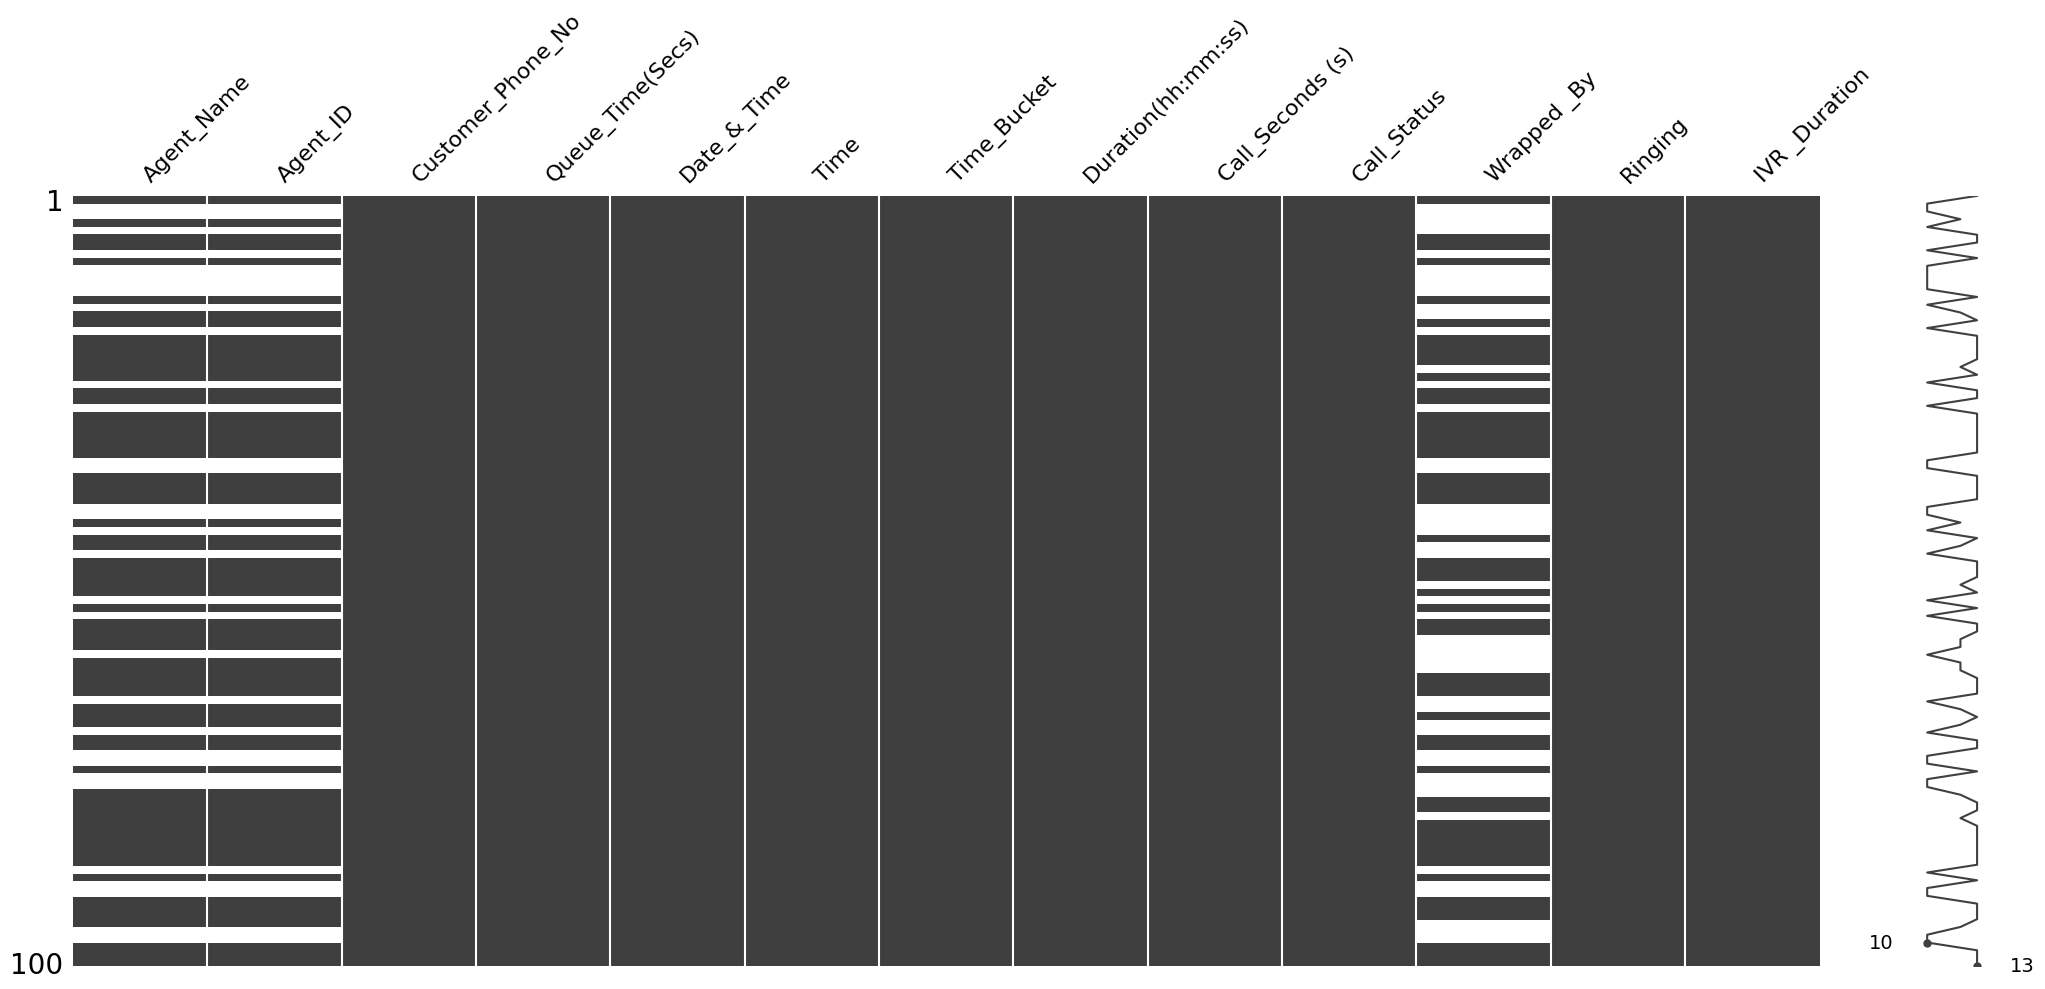

In [67]:
msno.matrix(df.sample(100))

<Axes: >

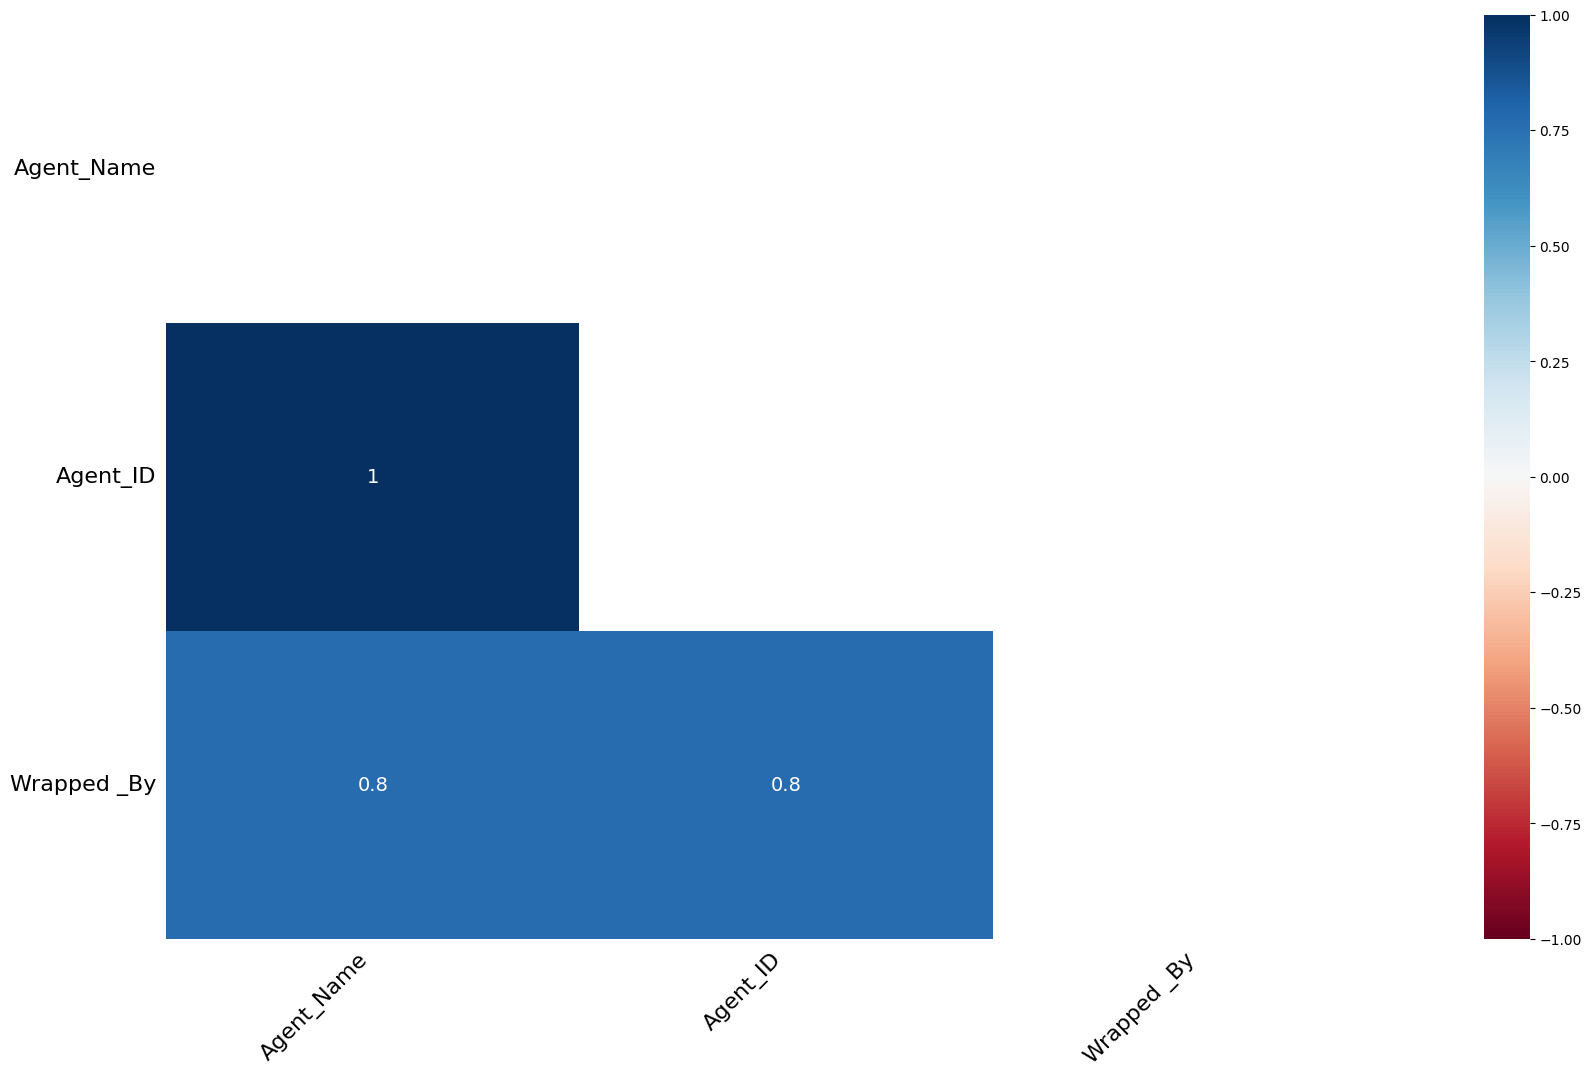

In [68]:
msno.heatmap(df)

<Axes: >

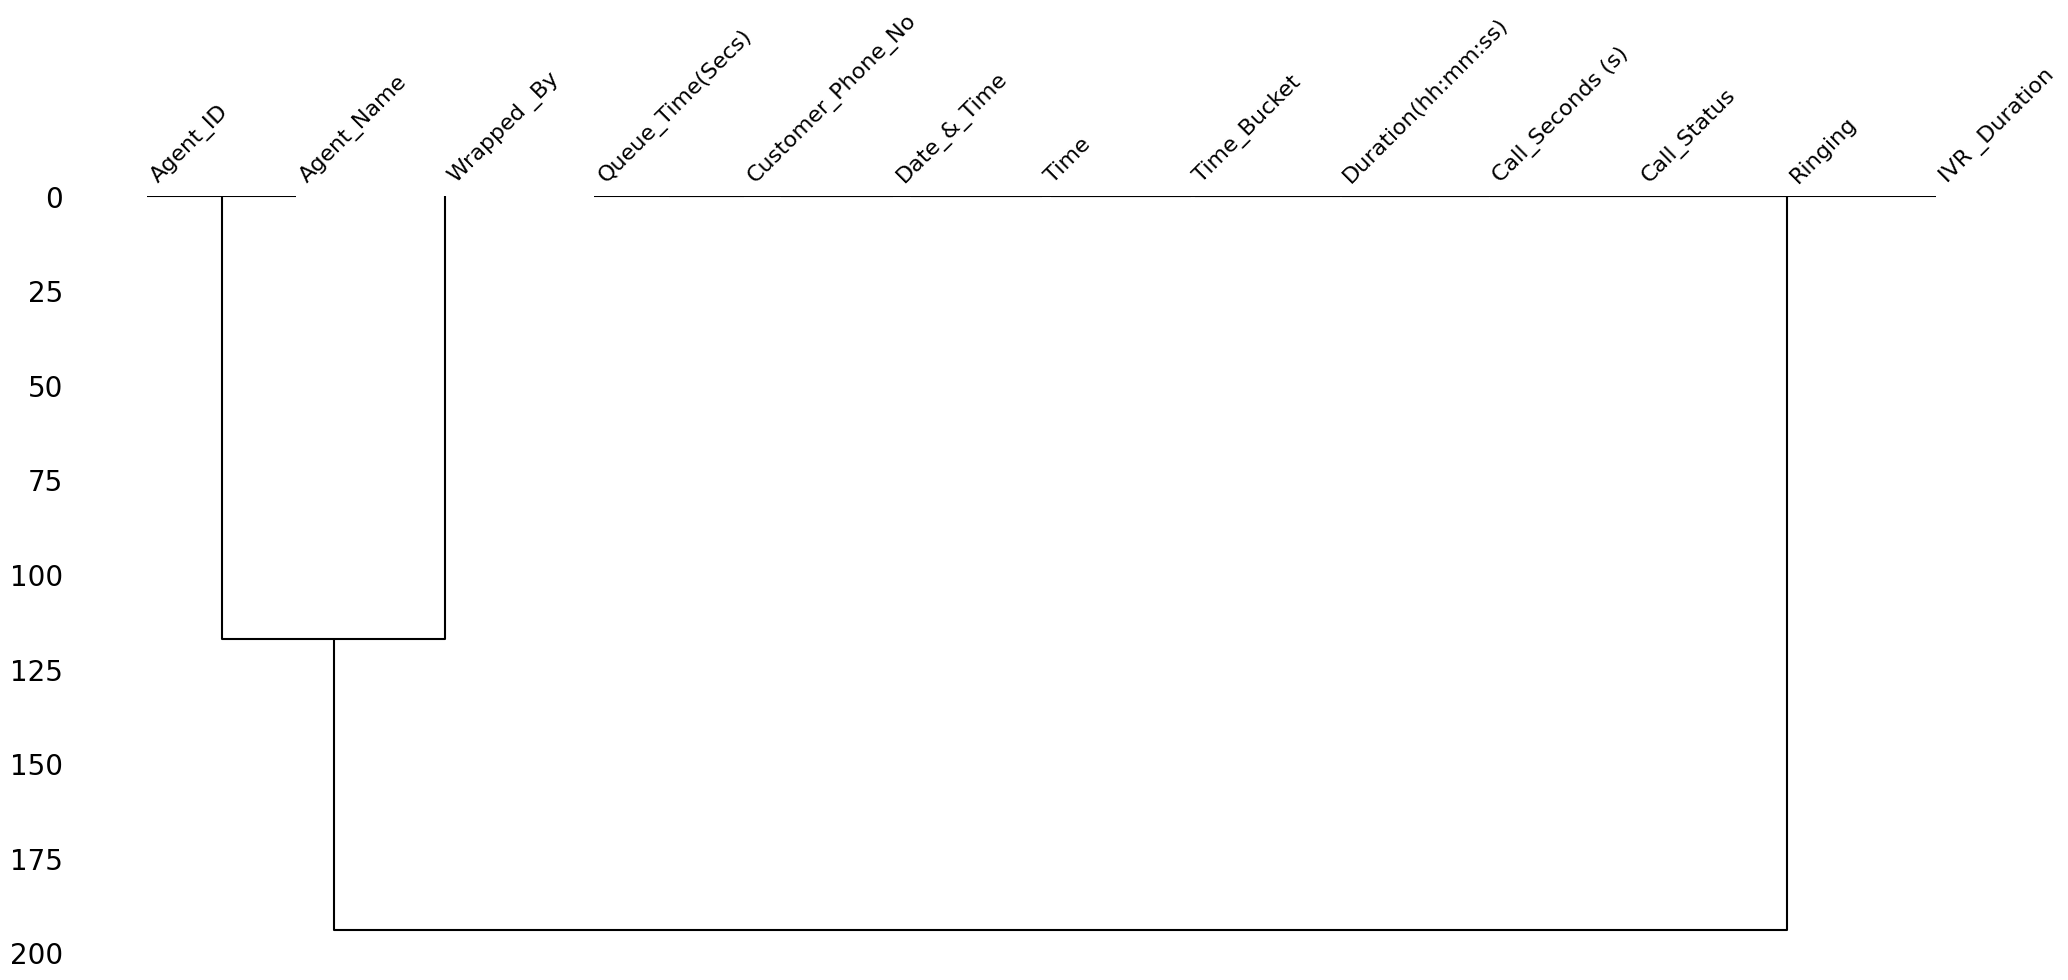

In [69]:
msno.dendrogram(df)

In [99]:
#rows where call status is abandon and agent id is null
df[(df['Call_Status']=='abandon') & (df['Agent_ID'].isnull())]

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration


In [100]:
df[['Agent_Name', 'Agent_ID','Wrapped _By']] = df[['Agent_Name','Agent_ID','Wrapped _By']].fillna('NA')

In [101]:
missing_values_table(df)

Your selected dataframe has 13 columns.
There are 0 columns that have missing values.


,Missing Values,% of Missing Values


#### we can clearly see the relation between agent name agent id and call status abandon , we are not dropping the columns

In [104]:
# count of null rows after the replacing
df.isna().sum()

Agent_Name            0
Agent_ID              0
Customer_Phone_No     0
Queue_Time(Secs)      0
Date_&_Time           0
Time                  0
Time_Bucket           0
Duration(hh:mm:ss)    0
Call_Seconds (s)      0
Call_Status           0
Wrapped _By           0
Ringing               0
IVR _Duration         0
dtype: int64

#### change the necessary datatypes

In [73]:
#change the datatype of date time functions from object to datetime
df['Date_&_Time'] = pd.to_datetime(df['Date_&_Time'])

In [75]:
#datatypes after modifying the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117047 entries, 0 to 117987
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Agent_Name          83790 non-null   object        
 1   Agent_ID            83790 non-null   float64       
 2   Customer_Phone_No   117047 non-null  object        
 3   Queue_Time(Secs)    117047 non-null  int64         
 4   Date_&_Time         117047 non-null  datetime64[ns]
 5   Time                117047 non-null  float64       
 6   Time_Bucket         117047 non-null  object        
 7   Duration(hh:mm:ss)  117047 non-null  object        
 8   Call_Seconds (s)    117047 non-null  float64       
 9   Call_Status         117047 non-null  object        
 10  Wrapped _By         70111 non-null   object        
 11  Ringing             117047 non-null  object        
 12  IVR _Duration       117047 non-null  object        
dtypes: datetime64[ns](1), float64(3), 

#### PREDICTIVE MANPOWER ANALYSIS

In [77]:
#predictive analysis:
total_call_capacity = df['Time_Bucket'].value_counts()
total_call_capacity

Time_Bucket
11_12    14444
10_11    13081
12_13    12562
13_14    11485
14_15    10509
9_10      9376
15_16     9141
16_17     8785
17_18     8530
18_19     7235
19_20     6444
20_21     5455
Name: count, dtype: int64

In [78]:
day_call_capacity = total_call_capacity*0.7
day_call_capacity

Time_Bucket
11_12    10110.8
10_11     9156.7
12_13     8793.4
13_14     8039.5
14_15     7356.3
9_10      6563.2
15_16     6398.7
16_17     6149.5
17_18     5971.0
18_19     5064.5
19_20     4510.8
20_21     3818.5
Name: count, dtype: float64

In [79]:
df['Time_Bucket'].value_counts()

Time_Bucket
11_12    14444
10_11    13081
12_13    12562
13_14    11485
14_15    10509
9_10      9376
15_16     9141
16_17     8785
17_18     8530
18_19     7235
19_20     6444
20_21     5455
Name: count, dtype: int64

In [80]:
df_1 = df.copy()

In [81]:
import pandas as pd
import numpy as np

# Define key constants and assumptions
work_days_per_week = 6
unplanned_leaves_per_month = 4
working_hours_per_day = 9
break_duration = 1.5
call_percentage = 0.6
target_abandon_rate = 0.1
total_days_per_month = 30

# Calculate available working hours
available_working_hours = working_hours_per_day - break_duration

# Calculate total working hours for an agent
total_working_hours = (
    working_hours_per_day
    * work_days_per_week
    * (total_days_per_month - unplanned_leaves_per_month / 30)
)

# Calculate calls handling time per agent for night shift
night_calls_handling_time = available_working_hours * call_percentage

# Calculate minimum agents needed for night shift
minimum_agents_night = np.ceil(
    30 / night_calls_handling_time / (1 - target_abandon_rate)
)

# Print the minimum agents needed for the night shift
print(f"Minimum Agents Needed for Night Shift: {minimum_agents_night}")

Minimum Agents Needed for Night Shift: 8.0


In [82]:
# Generate a datetime index for a single night with hourly frequency
date_rng_night = pd.date_range(start="2023-01-01 21:00:00", end="2023-01-02 08:59:59", freq="H")

# Create a dataframe with the datetime index
df_night = pd.DataFrame(date_rng_night, columns=["datetime"])

# Extract hour from the datetime index and create time buckets in the format "21_22", "22_23", etc.
df_night["time_bucket"] = (df_night["datetime"].dt.strftime('%H') + '_' + (df_night["datetime"] + pd.DateOffset(hours=1)).dt.strftime('%H'))

# Display the dataframe for the night shift
print(df_night)

              datetime time_bucket
0  2023-01-01 21:00:00       21_22
1  2023-01-01 22:00:00       22_23
2  2023-01-01 23:00:00       23_00
3  2023-01-02 00:00:00       00_01
4  2023-01-02 01:00:00       01_02
5  2023-01-02 02:00:00       02_03
6  2023-01-02 03:00:00       03_04
7  2023-01-02 04:00:00       04_05
8  2023-01-02 05:00:00       05_06
9  2023-01-02 06:00:00       06_07
10 2023-01-02 07:00:00       07_08
11 2023-01-02 08:00:00       08_09


In [83]:
df_night['calls_per_bucket_out_of_100'] = [3,3,2,2,1,1,1,1,3,4,4,5]

In [84]:
# Calculate te predicted 'night_calls' based on 'calls_per_bucket_out_of_100' and a constant factor
df_night['night_calls'] = df_night['calls_per_bucket_out_of_100'] * (35396.0 / 12)

In [85]:
df_night

,datetime,time_bucket,calls_per_bucket_out_of_100,night_calls
0,2023-01-01 21:00:00,21_22,3,8849.000000
1,2023-01-01 22:00:00,22_23,3,8849.000000
2,2023-01-01 23:00:00,23_00,2,5899.333333
3,2023-01-02 00:00:00,00_01,2,5899.333333
4,2023-01-02 01:00:00,01_02,1,2949.666667
5,2023-01-02 02:00:00,02_03,1,2949.666667
6,2023-01-02 03:00:00,03_04,1,2949.666667
7,2023-01-02 04:00:00,04_05,1,2949.666667
8,2023-01-02 05:00:00,05_06,3,8849.000000
9,2023-01-02 06:00:00,06_07,4,11798.666667
